In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re

In [2]:
df = pd.read_excel('./referred post info.xlsx')
df.info()
# df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77599 entries, 0 to 77598
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     77599 non-null  int64 
 1   so post        77599 non-null  object
 2   referred nums  77599 non-null  int64 
 3   topic          77598 non-null  object
 4   tag            77599 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [5]:
tag = df['tag'][0]
tag

tag_2 = df[df['referred nums']!=1]
tag_list = tag_2['tag']

In [6]:
# with open(path,'r',encoding='utf-8') as f:
#     text = f.read()
# tag_list = re.findall(r'Tags = (.*?)//',text)
tag_list = [tag.replace('><',' ').lstrip('<').rstrip('>') for tag in tag_list]
all_tags = ' '.join(tag_list)

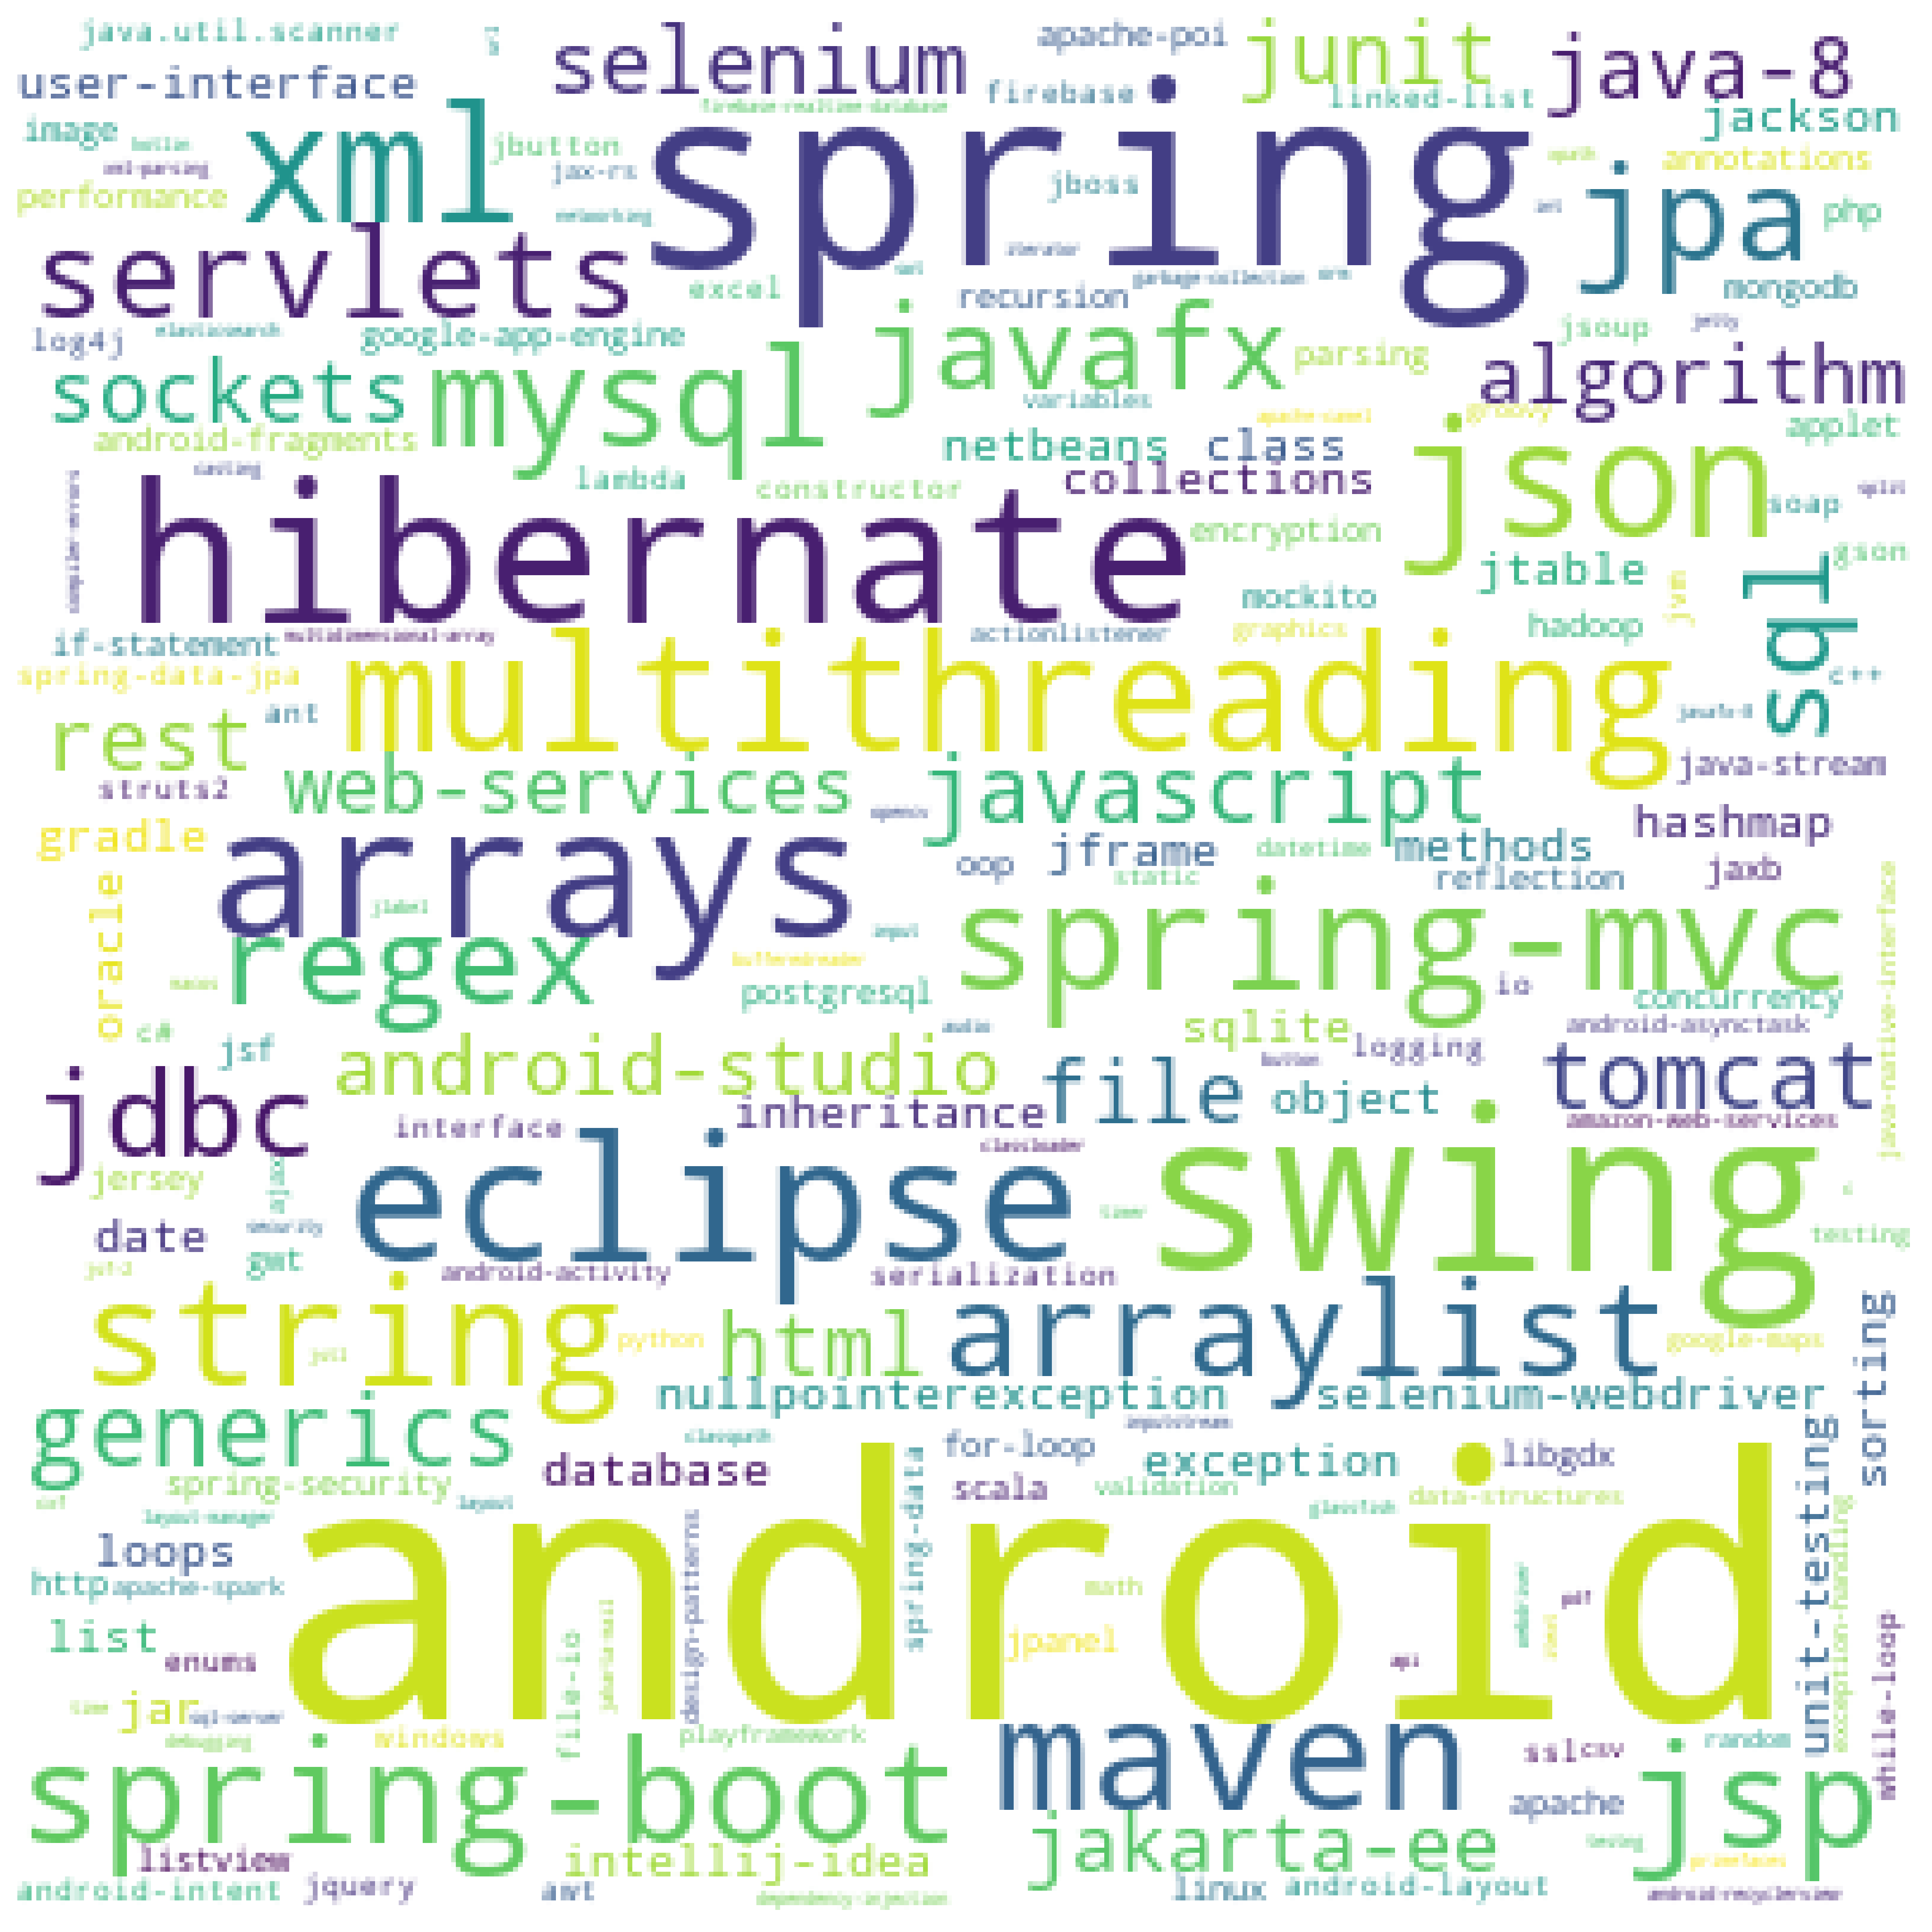

In [7]:
tag_dict = {}
l_tag = all_tags.split(' ')
for t in l_tag:
    if tag_dict. __contains__(t):
        tag_dict[t] = tag_dict[t] + 1
    else:
        tag_dict[t] = 1
        

tag_dict.pop('java')


import wordcloud
import matplotlib.pyplot as plt
WC = wordcloud.WordCloud(height= 400,width=400,background_color='white',repeat=False,mode='RGBA') #设置词云图对象属性
con = WC.fit_words(tag_dict)
plt.figure(figsize=(20,20), dpi=400)
plt.imshow(con)
plt.axis("off")






In [8]:
order_tag_dict = sorted(tag_dict.items(),key=lambda x: x[1], reverse=True)


In [9]:
dd = order_tag_dict[1:11]
word = []
nums = []
for i,j in dd:
    word.append(i)
    nums.append(j)

In [10]:
word,nums



(['spring',
  'swing',
  'hibernate',
  'arrays',
  'eclipse',
  'xml',
  'json',
  'multithreading',
  'maven',
  'string'],
 [3754, 2995, 2095, 1935, 1754, 1423, 1395, 1374, 1278, 1238])

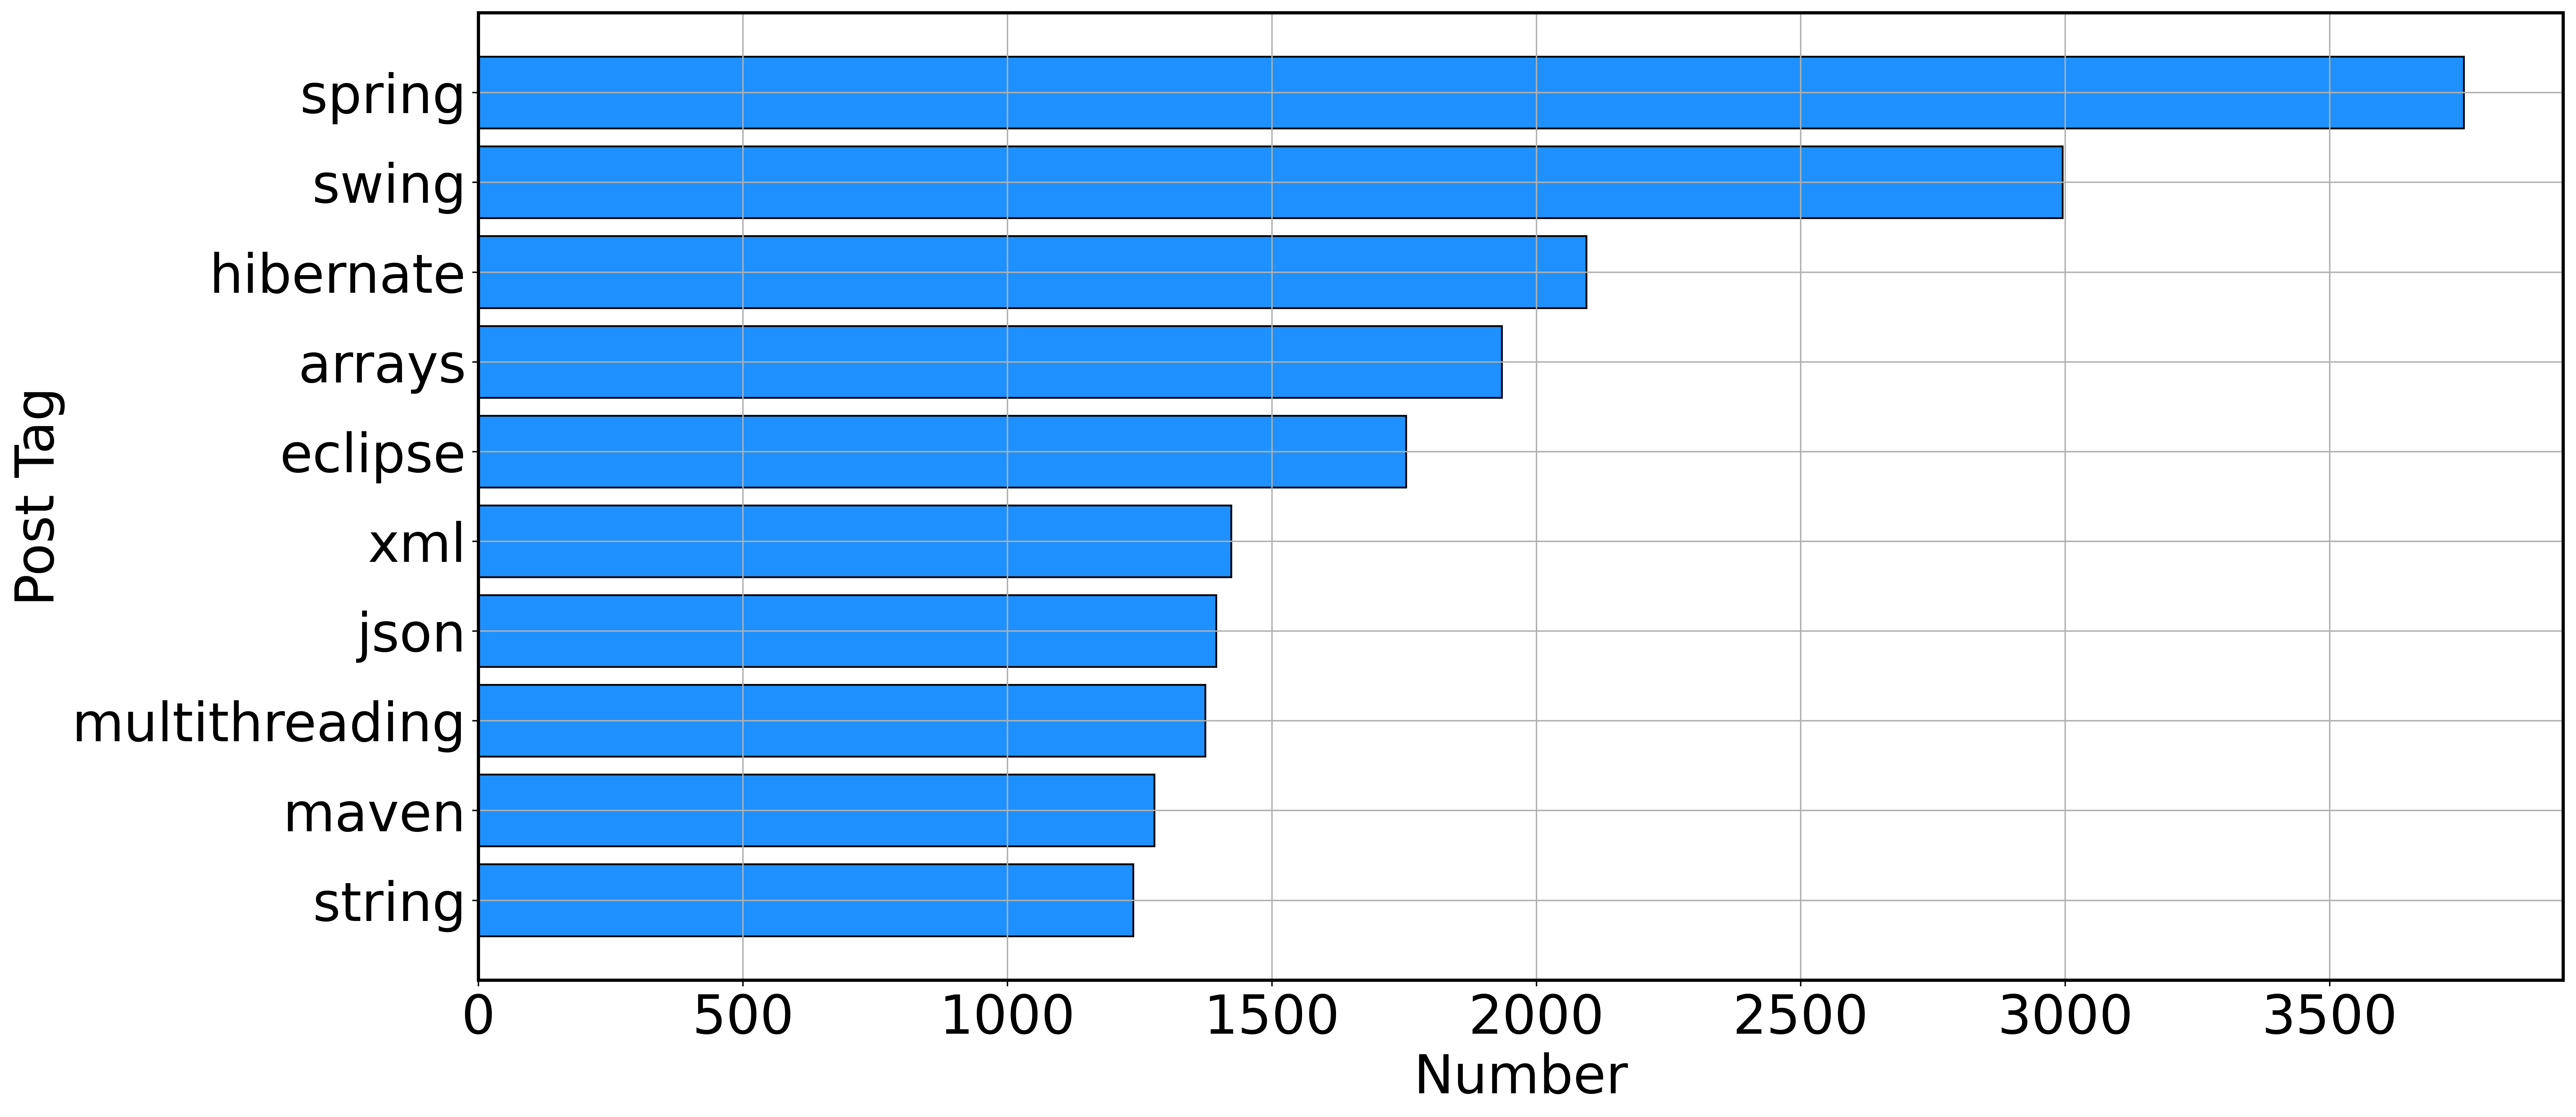

In [20]:
# plt.rcParams['font.size'] = 20
plt.figure(figsize=(21,10),dpi=400)
plt.barh(word[::-1],nums[::-1],color='#1E90FF',edgecolor='black')
plt.ylabel('Post Tag',fontsize=30)
plt.xlabel('Number',fontsize=30)
bwith = 1.8
ax = plt.gca()
# ax.spines['top'].set_color('red')
# ax.spines['right'].set_color('none')
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# ax.set_xlabel(...,fontsize=30)
#
# ax.set_ylabel(...,fontsize=30)
plt.grid()
plt.savefig('./draw_pic/post tags.jpg',bbox_inches = 'tight')

plt.show()

In [19]:
dd

[('java', 61126),
 ('android', 9791),
 ('spring', 3754),
 ('swing', 2995),
 ('hibernate', 2095),
 ('arrays', 1935),
 ('eclipse', 1754),
 ('xml', 1423),
 ('json', 1395),
 ('multithreading', 1374),
 ('maven', 1278)]